# Class08 Examples

# Review of Tricky Table Operations

In [18]:
from datascience import *
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Load a table from a file

In [2]:
file_path = "data/BenJerryData.csv"
ice_cream = Table().read_table(file_path)
ice_cream

Flavor,Calories (kcal),fat (g),sodium (mg),carbohydrates (g),protein (g),base ice cream
Peanut Butter Cup,470,33,180,36,9,peanut butter
Chubby Hubby,460,28,220,35,10,vanilla
Peanut Butter World,460,32,190,37,7,chocolate
Oat of This Swirled,420,26,150,41,5,vanilla
Everything But The...,420,26,90,40,7,chocolate
Gimmie S'more,410,24,180,45,6,vanilla
New York Super Fudge Chunk,410,26,70,39,7,chocolate
Chunky Monkey,400,25,50,41,6,vanilla
The Tonight Dough,400,22,135,47,6,vanilla
Urban Bourbon,400,22,95,44,7,caramal


## Running a statistic on a table column
A table is comprised of columns. Each column has a label and then an array of data. We use the .column() method to extract the data from a table column.

### Task: Find the average protein content

First pull out the data array.

In [4]:
protein = ice_cream.column('protein (g)')
protein

array([ 9, 10,  7,  5,  7,  6,  7,  6,  6,  7])

Once you have the array, you can using any of the numpy functions.

In [7]:
avg_protein = np.average(protein)
max_protein = np.max(protein)
min_protein = np.min(protein)

print(f" The max protein is {max_protein}, the min is {min_protein}, the average is {avg_protein} grams")

 The max protein is 10, the min is 5, the average is 7.0 grams


## Returning the top value of a column
### Task: Print the flavor with the highest calorie content

In [8]:
# Step 1: Sort the table
ice_cream_sorted = ice_cream.sort('Calories (kcal)', descending=True)
ice_cream_sorted

Flavor,Calories (kcal),fat (g),sodium (mg),carbohydrates (g),protein (g),base ice cream
Peanut Butter Cup,470,33,180,36,9,peanut butter
Chubby Hubby,460,28,220,35,10,vanilla
Peanut Butter World,460,32,190,37,7,chocolate
Oat of This Swirled,420,26,150,41,5,vanilla
Everything But The...,420,26,90,40,7,chocolate
Gimmie S'more,410,24,180,45,6,vanilla
New York Super Fudge Chunk,410,26,70,39,7,chocolate
Chunky Monkey,400,25,50,41,6,vanilla
The Tonight Dough,400,22,135,47,6,vanilla
Urban Bourbon,400,22,95,44,7,caramal


In [9]:
# Step 2: Extract the array for the column of interest
sorted_flavors = ice_cream_sorted.column('Flavor')
sorted_flavors

array(['Peanut Butter Cup', 'Chubby Hubby', 'Peanut Butter World',
       'Oat of This Swirled', 'Everything But The...', "Gimmie S'more",
       'New York Super Fudge Chunk', 'Chunky Monkey', 'The Tonight Dough',
       'Urban Bourbon'],
      dtype='<U26')

In [10]:
# Step 3: Pull out the first element of this array.
sorted_flavors.item(0)

'Peanut Butter Cup'

In [12]:
# Note: This steps can be combined into one operation
# But honestly, I wouldn't chain operations until you really understand each step
ice_cream.sort('Calories (kcal)', descending=True).column('Flavor').item(0)

'Peanut Butter Cup'

## Filtering rows in a table based on a condition
### Task: Create a table with only the flavors of ice cream that have fewer then 25 grams of fat.

In [13]:
# Need to filter? Use .where with the appropriate predicate
ice_cream.where('fat (g)', are.below(25))

Flavor,Calories (kcal),fat (g),sodium (mg),carbohydrates (g),protein (g),base ice cream
Gimmie S'more,410,24,180,45,6,vanilla
The Tonight Dough,400,22,135,47,6,vanilla
Urban Bourbon,400,22,95,44,7,caramal


## Adding a column to a table based on a mathematical combination of other columns
### Task: Add a column that is the ratio of protein to carbohydrates (I'm not saying this is nutritionally useful).
The steps are:
- Extract the data arrays from the columns
- Do the math
- Put the result in a new column

In [15]:
# Extract the arrays
protein = ice_cream.column('protein (g)')
carbs = ice_cream.column('carbohydrates (g)')

# Do the math
ratio = protein / carbs

# Create the new column
ice_cream_with_ratio = ice_cream.with_columns('protein/carbs', ratio)
ice_cream_with_ratio

Flavor,Calories (kcal),fat (g),sodium (mg),carbohydrates (g),protein (g),base ice cream,protein/carbs
Peanut Butter Cup,470,33,180,36,9,peanut butter,0.25
Chubby Hubby,460,28,220,35,10,vanilla,0.285714
Peanut Butter World,460,32,190,37,7,chocolate,0.189189
Oat of This Swirled,420,26,150,41,5,vanilla,0.121951
Everything But The...,420,26,90,40,7,chocolate,0.175
Gimmie S'more,410,24,180,45,6,vanilla,0.133333
New York Super Fudge Chunk,410,26,70,39,7,chocolate,0.179487
Chunky Monkey,400,25,50,41,6,vanilla,0.146341
The Tonight Dough,400,22,135,47,6,vanilla,0.12766
Urban Bourbon,400,22,95,44,7,caramal,0.159091


In [17]:
# Again, the operations can be combined into a single line.
# You don't need to do this, but you should understand it.
ice_cream_with_ratio2 = ice_cream.with_columns('protein/carbs)', ice_cream.column('protein (g)') / ice_cream.column('carbohydrates (g)'))
ice_cream_with_ratio2

Flavor,Calories (kcal),fat (g),sodium (mg),carbohydrates (g),protein (g),base ice cream,protein/carbs)
Peanut Butter Cup,470,33,180,36,9,peanut butter,0.25
Chubby Hubby,460,28,220,35,10,vanilla,0.285714
Peanut Butter World,460,32,190,37,7,chocolate,0.189189
Oat of This Swirled,420,26,150,41,5,vanilla,0.121951
Everything But The...,420,26,90,40,7,chocolate,0.175
Gimmie S'more,410,24,180,45,6,vanilla,0.133333
New York Super Fudge Chunk,410,26,70,39,7,chocolate,0.179487
Chunky Monkey,400,25,50,41,6,vanilla,0.146341
The Tonight Dough,400,22,135,47,6,vanilla,0.12766
Urban Bourbon,400,22,95,44,7,caramal,0.159091


**Bonus question: What are the units of the protein/carbs ratio?**

# Functions
Thousands of functions are built into the Python computer language and still others can be loaded by using the `import` Python command. This is very powerful and provides almost limitless capability to the Python language. However, there are many times when a custom function may be needed and this is a very powerful way to automate repetitive data handling and analysis tasks in a reproducible manner. Functions take arguments given in paretheses *()* directly following the name. For instance below is the built-in Python print function:

## Adding a table column based on a calculation using other columns

### Task: Add a column to the ice_cream table 

In [51]:
def double(x):
    """ doubles """
    return 2*x

In [53]:
help(double)

Help on function double in module __main__:

double(x)
    doubles



In [54]:
def triple(xtra):
    """ triples """
    return 3*xtra

In [55]:
x = double(4)*triple(4)
x

96

# Applying functions to Tables

Suppose we were give a table of x1, y1, x2, y2 coordinates pairs.

In [56]:
from datascience import *
import numpy as np
%matplotlib inline

x1 = make_array(1, 3, 6, 0)
x2 = make_array(2, 4, 1, 4)
y1 = make_array(3, 5, 1, 0)
y2 = make_array(3, 2, 4, 3)
coordinate_pairs = Table().with_columns("x1", x1, "y1", y1, "x2", x2, "y2", y2)
coordinate_pairs

x1,y1,x2,y2
1,3,2,3
3,5,4,2
6,1,1,4
0,0,4,3


Now suppose we want to add a column that contain the distance between the (x1, y1) and (x2, y2) pairs.

$$ distance = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} $$

FIRST: Create a function to calculate distance.

In [57]:
def distance(x1, y1, x2, y2):
    """ 
    This function takes two pairs of (x,y) coordinates
    and calulates the Euclidean distance using the
    Pythagorean theorem.
    """
    delta_x = x1 - x2
    delta_y = y1 - y2
    dist = np.sqrt(delta_x**2 + delta_y**2)
    return dist

In [58]:
# Test our function with a 3, 4, 5 triangle
x1 = 0
x2 = 4
y1 = 0
y2 = 3
distance(x1, y1, x2, y2) # result should be 5

5.0

#### Now use apply to compute new Table column

In [59]:
coordinate_pairs = coordinate_pairs.with_columns(
    "distance", coordinate_pairs.apply(distance, 'x1', 'y1', 'x2', 'y2')
)

coordinate_pairs

x1,y1,x2,y2,distance
1,3,2,3,1
3,5,4,2,3.16228
6,1,1,4,5.83095
0,0,4,3,5


# Visualize Table Data

### Scatter depicts relationship between two variables

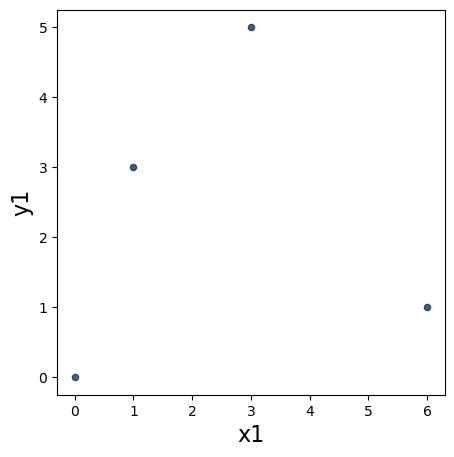

In [61]:
coordinate_pairs.scatter('x1', 'y1')

## Histograms

In [19]:
# Instead of using real names, we will use a python package that generates fake name.
# This is an excellent way to anonymize personal data.

!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.8 MB/s eta 0:00:0000:0100:01


In [20]:
from faker import Faker
fake = Faker()
fake.name()

'William Gordon'

In [21]:
names = []
for i in np.arange(28):
    names.append(fake.name())
names = np.array(names)
names

array(['Kevin Manning', 'Heather Ferguson', 'Matthew Morrow',
       'Robert Elliott', 'James Archer', 'Angela Gonzalez',
       'Shari Solis DDS', 'Jeffrey Harrison', 'Jeffrey Summers',
       'John Morgan Jr.', 'John Pierce', 'Martha Bell', 'Latoya Wilkins',
       'Chelsea Turner', 'Eric Dominguez', 'Donald Allen', 'Amy Johnson',
       'Crystal Ware', 'Thomas Johnson', 'Stephanie Johnson',
       'Elizabeth Gonzales', 'Darrell Graham', 'Joel Thompson',
       'Megan Dawson', 'Elizabeth Harvey', 'Kiara Kim', 'Sara Chavez',
       'Anthony Garcia'],
      dtype='<U18')

In [22]:
scores = make_array(
    1.00,
    3.50,
    2.50,
    4.00,
    6.00,
    5.50,
    4.00,
    2.50,
    2.50,
    2.00,
    1.00,
    3.50,
    4.50,
    3.00,
    1.00,
    4.50,
    5.00,
    6.00,
    4.00,
    5.00,
    3.50,
    4.00,
    3.00,
    2.00,
    3.00,
    6.00,
    4.00,
    4.00
)

scores

array([ 1. ,  3.5,  2.5,  4. ,  6. ,  5.5,  4. ,  2.5,  2.5,  2. ,  1. ,
        3.5,  4.5,  3. ,  1. ,  4.5,  5. ,  6. ,  4. ,  5. ,  3.5,  4. ,
        3. ,  2. ,  3. ,  6. ,  4. ,  4. ])

In [23]:
quiz2 = Table().with_columns("Name", names, "Score", scores)
quiz2

Name,Score
Kevin Manning,1
Heather Ferguson,3.5
Matthew Morrow,2.5
Robert Elliott,4
James Archer,6
Angela Gonzalez,5.5
Shari Solis DDS,4
Jeffrey Harrison,2.5
Jeffrey Summers,2.5
John Morgan Jr.,2


In [25]:
help(quiz2.stats)

Help on method stats in module datascience.tables:

stats(ops=(<built-in function min>, <built-in function max>, <function median at 0x7d80903515a0>, <built-in function sum>)) method of datascience.tables.Table instance
    Compute statistics for each column and place them in a table.
    
    Args:
        ``ops`` -- A tuple of stat functions to use to compute stats.
    
    Returns:
        A ``Table`` with a prepended statistic column with the name of the
        fucntion's as the values and the calculated stats values per column.
    
    By default stats calculates the minimum, maximum, np.median, and sum of each
    column.
    
    >>> table = Table().with_columns(
    ...     'A', make_array(4, 0, 6, 5),
    ...     'B', make_array(10, 20, 17, 17),
    ...     'C', make_array(18, 13, 2, 9))
    >>> table.stats()
    statistic | A    | B    | C
    min       | 0    | 10   | 2
    max       | 6    | 20   | 18
    median    | 4.5  | 17   | 11
    sum       | 15   | 64   | 42
    

In [24]:
quiz2.stats((np.min, np.max, np.mean, np.median, np.std))

statistic,Name,Score
amin,,1
amax,,6
mean,,3.58929
median,,3.75
std,,1.43336


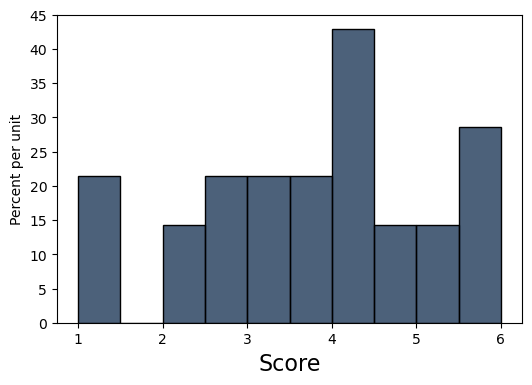

In [68]:
quiz2.hist('Score')

## To understand the units on the vertical scale
Read: https://www.stat.berkeley.edu/~stark/SticiGui/Text/histograms.htm

# Understanding function documentation
http://www.data8.org/datascience/_autosummary/datascience.tables.Table.hist.html

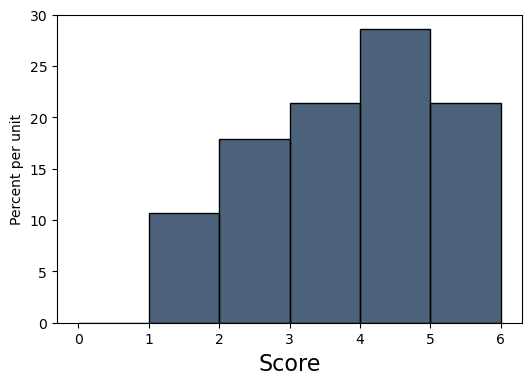

In [69]:
# Try one of the options shown in the documentation.
quiz2.hist('Score', bins = [0, 1, 2, 3, 4, 5, 6])

## Bar plot

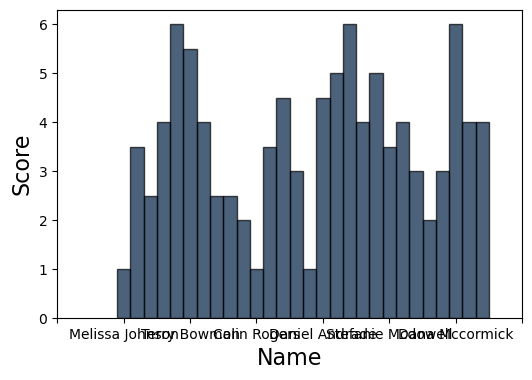

In [70]:
quiz2.bar('Name','Score')

## When we need to customize the plot we have to reach into the underlying matplotlib plotting library.

[Text(-5.0, 0, ''),
 Text(0.0, 0, 'Melissa Johnson'),
 Text(5.0, 0, 'Terry Bowman'),
 Text(10.0, 0, 'Colin Rogers'),
 Text(15.0, 0, 'Daniel Andrade'),
 Text(20.0, 0, 'Stefanie Mcdowell'),
 Text(25.0, 0, 'Dana Mccormick'),
 Text(30.0, 0, '')]

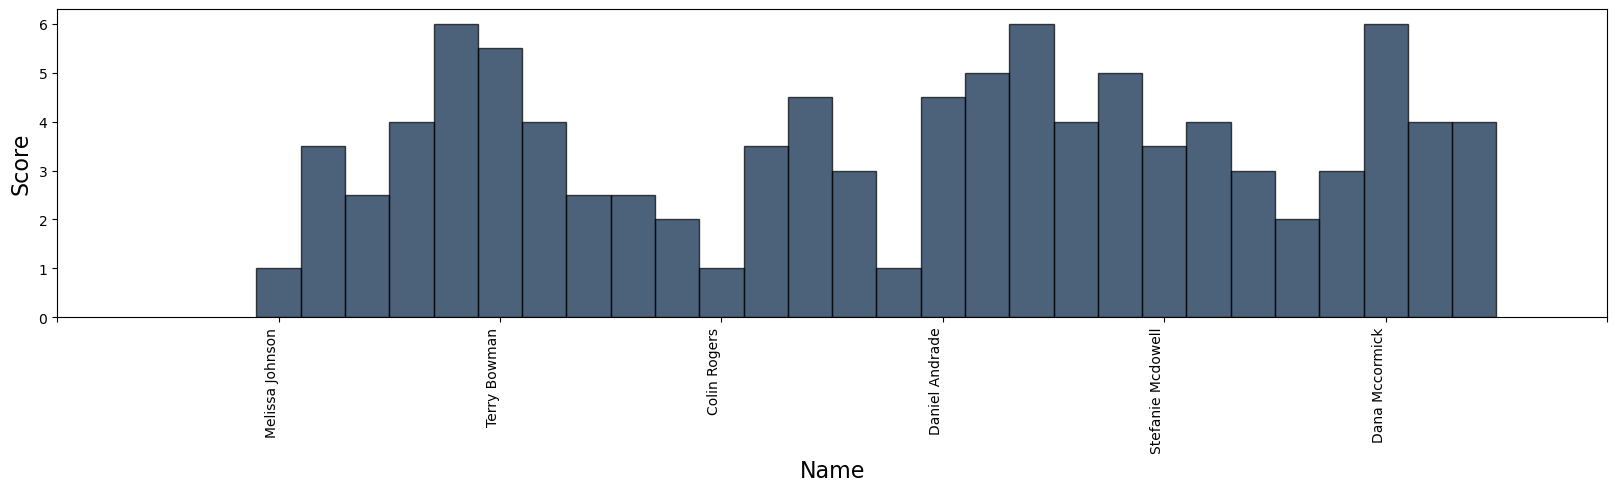

In [71]:
quiz2.bar('Name','Score', width=20)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

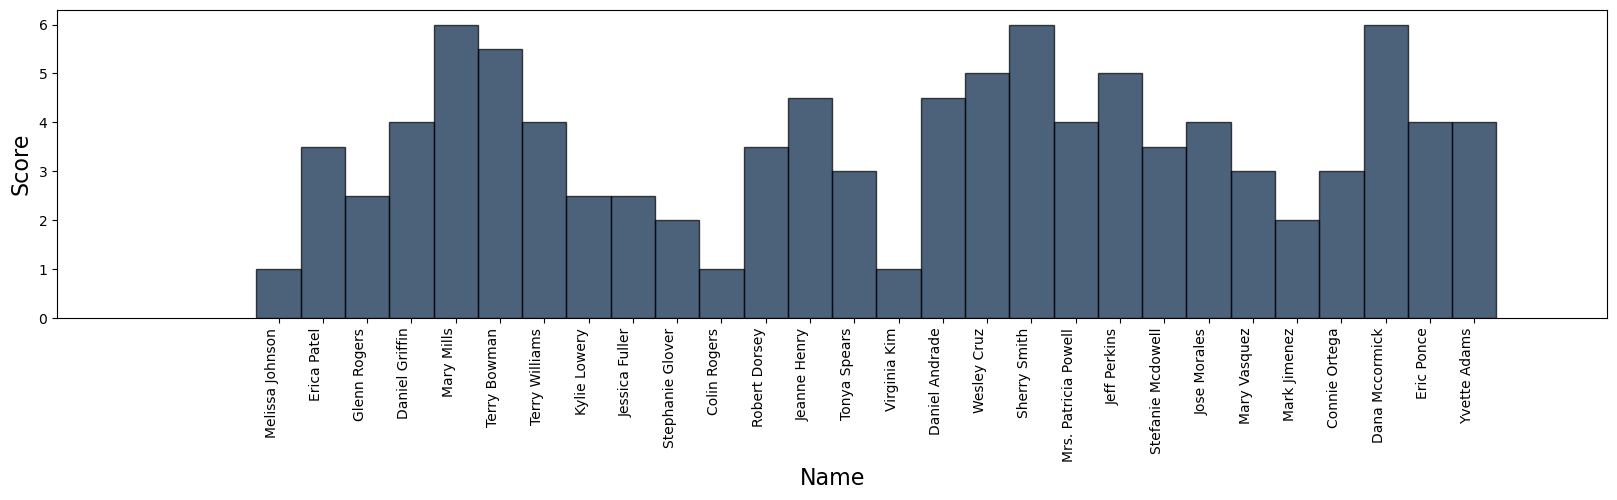

In [73]:
quiz2.bar('Name','Score', width=20)
ax = plt.gca()
ax.set_xticks(np.arange(len(quiz2.column('Name'))))
ax.set_xticklabels(names, rotation=90, ha='right');

In [78]:
quiz2_sorted = quiz2.sort('Score', descending=True)
quiz2_sorted

Name,Score
Mary Mills,6
Sherry Smith,6
Dana Mccormick,6
Terry Bowman,5.5
Wesley Cruz,5
Jeff Perkins,5
Jeanne Henry,4.5
Daniel Andrade,4.5
Daniel Griffin,4
Terry Williams,4


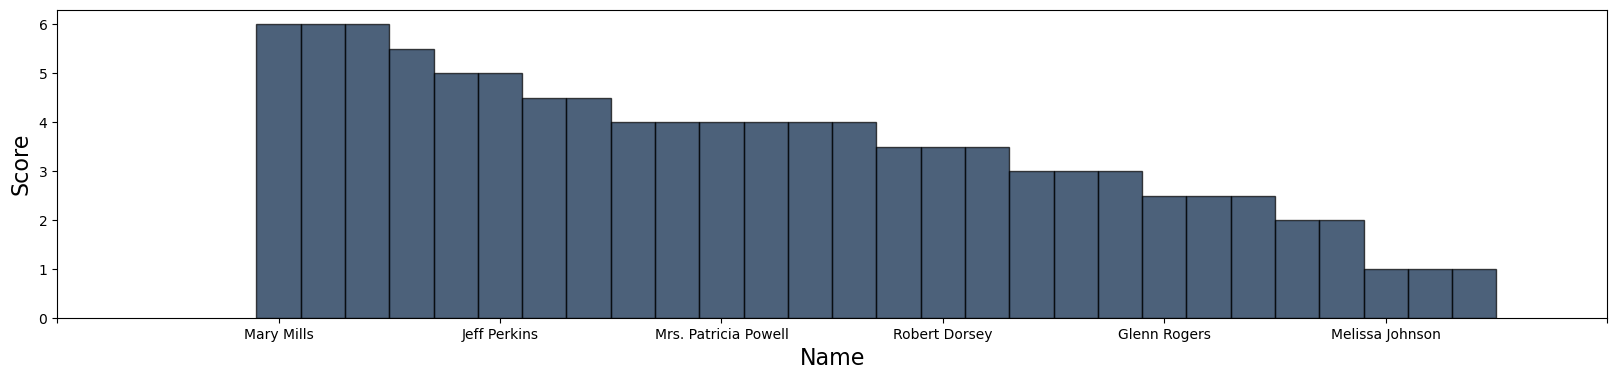

In [79]:
quiz2_sorted.bar('Name','Score', width=20)

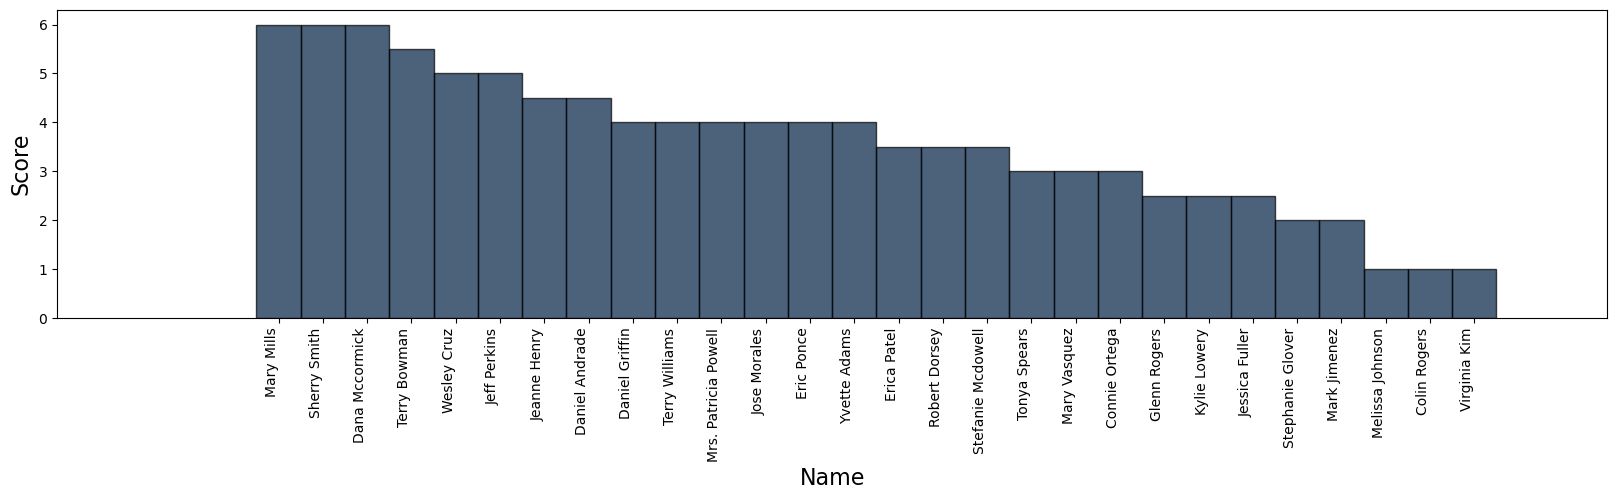

In [80]:
quiz2_sorted.bar('Name','Score', width=20)
names = quiz2_sorted.column('Name')
ax = plt.gca()
ax.set_xticks(np.arange(len(quiz2.column('Name'))))
ax.set_xticklabels(names, rotation=90, ha='right');